In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data = pd.read_csv("INR-USD.csv")

print(data.head(10))

         Date       Open       High        Low      Close  Adj Close  Volume
0  2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0
1  2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0
2  2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0
3  2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0
4  2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0
5  2004-01-05  45.528000  45.604000  45.230000  45.351002  45.351002     0.0
6  2004-01-12  45.328999  45.405998  45.231998  45.352001  45.352001     0.0
7  2004-01-19  45.356998  45.393002  45.230000  45.243999  45.243999     0.0
8  2004-01-26  45.250000  45.332001  45.000000  45.000000  45.000000     0.0
9  2004-02-02  45.151001  45.244999  45.105000  45.290001  45.290001     0.0


In [3]:
data = data.dropna()

In [4]:
print(data.describe())

              Open         High          Low        Close    Adj Close  Volume
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000  1013.0
mean     58.035208    58.506681    57.654706    58.056509    58.056509     0.0
std      12.614635    12.716632    12.565279    12.657407    12.657407     0.0
min      38.995998    39.334999    38.979000    39.044998    39.044998     0.0
25%      45.508999    45.775002    45.231998    45.498001    45.498001     0.0
50%      59.702999    60.342999    59.209999    59.840000    59.840000     0.0
75%      68.508499    69.099998    68.250000    68.538002    68.538002     0.0
max      82.917999    83.386002    82.563004    82.932999    82.932999     0.0


In [5]:
figure = px.line(data, x="Date", 
                 y="Close", 
                 title='USD - INR Conversion Rate over the years')
figure.show()

In [6]:
data["Date"] = pd.to_datetime(data["Date"], format = '%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data["Month"] = data["Date"].dt.month
print(data.head())

        Date       Open       High        Low      Close  Adj Close  Volume  \
0 2003-12-01  45.709000  45.728001  45.449001  45.480000  45.480000     0.0   
1 2003-12-08  45.474998  45.507999  45.352001  45.451000  45.451000     0.0   
2 2003-12-15  45.450001  45.500000  45.332001  45.455002  45.455002     0.0   
3 2003-12-22  45.417000  45.549000  45.296001  45.507999  45.507999     0.0   
4 2003-12-29  45.439999  45.645000  45.421001  45.560001  45.560001     0.0   

   Year  Month  
0  2003     12  
1  2003     12  
2  2003     12  
3  2003     12  
4  2003     12  


In [7]:
import plotly.graph_objs as go
import plotly.io as pio

# Calculate yearly growth
growth = data.groupby('Year').agg({'Close': lambda x: (x.iloc[-1]-x.iloc[0])/x.iloc[0]*100})

fig = go.Figure()
fig.add_trace(go.Bar(x=growth.index,
                     y=growth['Close'],
                     name='Yearly Growth'))

fig.update_layout(title="Yearly Growth of USD - INR Conversion Rate",
                  xaxis_title="Year",
                  yaxis_title="Growth (%)",
                  width=900,
                  height=600)

pio.show(fig)

In [8]:
# Calculate monthly growth
data['Growth'] = data.groupby(['Year', 'Month'])['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Group data by Month and calculate average growth
grouped_data = data.groupby('Month').mean().reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_data['Month'],
    y=grouped_data['Growth'],
    marker_color=grouped_data['Growth'],
    hovertemplate='Month: %{x}<br>Average Growth: %{y:.2f}%<extra></extra>'
))

fig.update_layout(
    title="Aggregated Monthly Growth of USD - INR Conversion Rate",
    xaxis_title="Month",
    yaxis_title="Average Growth (%)",
    width=900,
    height=600
)

pio.show(fig)

C:\Users\deepg\AppData\Local\Temp\ipykernel_15024\1029362683.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 432x288 with 0 Axes>

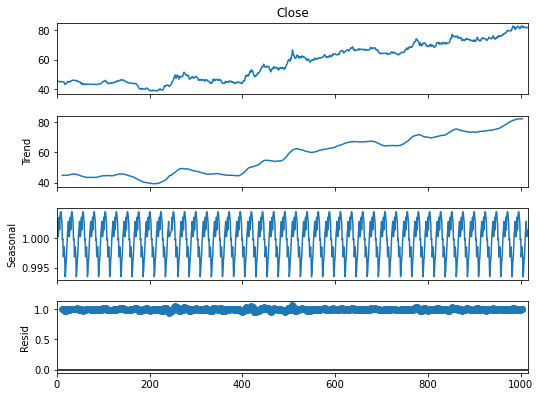

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=24)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(8, 6)
fig.show()

In [10]:
p, d, q = 2, 1, 0

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  
fitted = model.fit() 
print(fitted.summary())

c:\Users\deepg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\deepg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 1013
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -905.797
Date:                            Thu, 01 Aug 2024   AIC                           1821.594
Time:                                    23:25:18   BIC                           1845.929
Sample:                                         0   HQIC                          1830.861
                                           - 1013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.026      1.194      0.233      -0.020       0.083
ar.L2          0.0643      0.026   

In [12]:
predictions = fitted.predict(len(data), len(data)+60)
print(predictions)

1013    81.732806
1014    81.886990
1015    82.180318
1016    82.607755
1017    82.474242
          ...    
1069    84.906873
1070    85.402528
1071    85.520224
1072    85.830554
1073    85.687360
Name: predicted_mean, Length: 61, dtype: float64


c:\Users\deepg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\deepg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [13]:
# Create figure
fig = go.Figure()

# Add training data line plot
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close'],
    mode='lines',
    name='Training Data',
    line=dict(color='blue')
))

# Add predictions line plot
fig.add_trace(go.Scatter(
    x=predictions.index,
    y=predictions,
    mode='lines',
    name='Predictions',
    line=dict(color='green')
))

fig.update_layout(
    title="INR Rate - Training Data and Predictions",
    xaxis_title="Date",
    yaxis_title="Close",
    legend_title="Data",
    width=900,
    height=600
)

pio.show(fig)

In [14]:
import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX 

model = SARIMAX(data["Close"], order=(p, d, q), 
                seasonal_order=(p, d, q, 52))  
fitted = model.fit() 

# Assuming `model` is your trained SARIMA model
with open('sarima_model.pkl', 'wb') as f:
    pickle.dump(model, f)


c:\Users\deepg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\deepg\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

